In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
train = pd.read_csv('data/train_data/train_task_3_4.csv')
validation = pd.read_csv('data/test_data/quality_response_remapped_public.csv')
test = pd.read_csv('data/test_data/quality_response_remapped_private.csv')

train.nunique(), validation.nunique(), test.nunique()

(QuestionId           948
 UserId              4918
 AnswerId         1382727
 IsCorrect              2
 CorrectAnswer          4
 AnswerValue            4
 dtype: int64,
 Unnamed: 0.1    25
 Unnamed: 0      25
 left            24
 right           25
 T1_ALR           2
 T2_CL            2
 T3_GF            2
 T4_MQ            2
 T5_NS            2
 dtype: int64,
 Unnamed: 0.1    25
 Unnamed: 0      25
 left            25
 right           24
 T1_ALR           2
 T2_CL            2
 T3_GF            2
 T4_MQ            2
 T5_NS            2
 dtype: int64)

In [3]:
# Check for missing values
train.isnull().sum(), validation.isnull().sum(), test.isnull().sum()

(QuestionId       0
 UserId           0
 AnswerId         0
 IsCorrect        0
 CorrectAnswer    0
 AnswerValue      0
 dtype: int64,
 Unnamed: 0.1    0
 Unnamed: 0      0
 left            0
 right           0
 T1_ALR          0
 T2_CL           0
 T3_GF           0
 T4_MQ           0
 T5_NS           0
 dtype: int64,
 Unnamed: 0.1    0
 Unnamed: 0      0
 left            0
 right           0
 T1_ALR          0
 T2_CL           0
 T3_GF           0
 T4_MQ           1
 T5_NS           0
 dtype: int64)

In [4]:
# Load Metadatas
answer_meta = pd.read_csv('data/metadata/answer_metadata_task_3_4.csv')
question_meta = pd.read_csv('data/metadata/question_metadata_task_3_4.csv')
student_meta = pd.read_csv('data/metadata/student_metadata_task_3_4.csv')

answer_meta.nunique(), question_meta.nunique(), student_meta.nunique()

(AnswerId          1508917
 DateAnswered       182020
 Confidence              5
 GroupId               390
 QuizId                120
 SchemeOfWorkId          2
 dtype: int64,
 QuestionId    948
 SubjectId      62
 dtype: int64,
 UserId          6148
 Gender             4
 DateOfBirth       65
 PremiumPupil       2
 dtype: int64)

In [5]:
# Check Answer Metadata
answer_meta.isnull().sum()

AnswerId                0
DateAnswered            0
Confidence        1125821
GroupId                 0
QuizId                  0
SchemeOfWorkId     143461
dtype: int64

In [6]:
# Remove missing values

answer_meta = answer_meta.dropna()
answer_meta.isnull().sum()

AnswerId          0
DateAnswered      0
Confidence        0
GroupId           0
QuizId            0
SchemeOfWorkId    0
dtype: int64

In [7]:
# Merge 'Confidence' to train
train = pd.merge(train, answer_meta[['AnswerId', 'Confidence']], on='AnswerId', how='left')

train.head()

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue,Confidence
0,898,2111,280203,1,2,2,NaN
1,767,3062,55638,1,3,3,25.0
2,165,1156,386475,1,2,2,NaN
3,490,1653,997498,1,4,4,NaN
4,298,3912,578636,1,3,3,NaN


In [8]:
train['Confidence'].value_counts()

100.0    153434
75.0      85074
50.0      51450
0.0       27999
25.0      16981
Name: Confidence, dtype: int64

In [9]:
# Replace missing values with mean

train['Confidence'] = train['Confidence'].fillna(train['Confidence'].mean())

train.isnull().sum()

QuestionId       0
UserId           0
AnswerId         0
IsCorrect        0
CorrectAnswer    0
AnswerValue      0
Confidence       0
dtype: int64

In [10]:
train.head()

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue,Confidence
0,898,2111,280203,1,2,2,73.807615
1,767,3062,55638,1,3,3,25.000000
2,165,1156,386475,1,2,2,73.807615
3,490,1653,997498,1,4,4,73.807615
4,298,3912,578636,1,3,3,73.807615


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1382727 entries, 0 to 1382726
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   QuestionId     1382727 non-null  int64  
 1   UserId         1382727 non-null  int64  
 2   AnswerId       1382727 non-null  int64  
 3   IsCorrect      1382727 non-null  int64  
 4   CorrectAnswer  1382727 non-null  int64  
 5   AnswerValue    1382727 non-null  int64  
 6   Confidence     1382727 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 84.4 MB


In [12]:
train.describe()

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue,Confidence
count,1.382727e+06,1.382727e+06,1.382727e+06,1.382727e+06,1.382727e+06,1.382727e+06,1.382727e+06
mean,4.682276e+02,3.036283e+03,7.544279e+05,5.373317e-01,2.390497e+00,2.437992e+00,7.380762e+01
std,2.735797e+02,1.770599e+03,4.356190e+05,4.986046e-01,1.066479e+00,1.067624e+00,1.539051e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2.330000e+02,1.515000e+03,3.772935e+05,0.000000e+00,1.000000e+00,2.000000e+00,7.380762e+01
50%,4.680000e+02,3.009000e+03,7.544530e+05,1.000000e+00,2.000000e+00,2.000000e+00,7.380762e+01
75%,7.030000e+02,4.565000e+03,1.131772e+06,1.000000e+00,3.000000e+00,3.000000e+00,7.380762e+01
max,9.470000e+02,6.147000e+03,1.508916e+06,1.000000e+00,4.000000e+00,4.000000e+00,1.000000e+02


In [13]:
train.nunique()

QuestionId           948
UserId              4918
AnswerId         1382727
IsCorrect              2
CorrectAnswer          4
AnswerValue            4
Confidence             6
dtype: int64

In [14]:
# 1. Calculate the Correct Answer Rate (CAR) for each question
# Check IsCorrect by UserId

score = train.groupby('UserId')['IsCorrect'].mean().reset_index().values
score = {user_id: correct_rate for user_id, correct_rate in score}

train['CAR'] = train['UserId'].map(score)

question_id = train.groupby('QuestionId').apply(lambda gpby_df: gpby_df.name)
CAR = train.groupby('QuestionId').apply(lambda gpby_df: (gpby_df['IsCorrect'] - gpby_df['CAR']).abs().mean())
CAR = pd.Series(CAR, index=question_id, name='CAR')

C:\Users\dolon\AppData\Local\Temp\ipykernel_22736\614288091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(CAR)


<Axes: xlabel='CAR', ylabel='Density'>

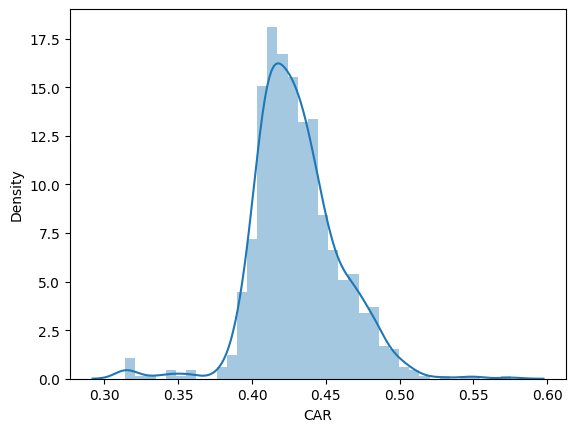

In [15]:
sns.distplot(CAR)

C:\Users\dolon\AppData\Local\Temp\ipykernel_22736\2104811435.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Clearity'])


<Axes: xlabel='Clearity', ylabel='Density'>

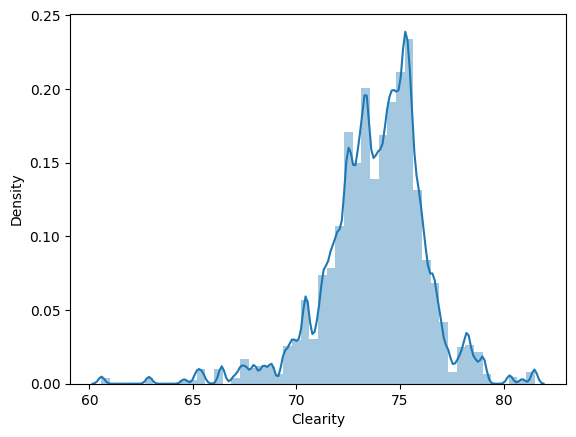

In [25]:
# 2. Calculate clearity for each question
# Check Confidence by QuestionId

question_id = train.groupby('QuestionId').apply(lambda gpby_df: gpby_df.name)
clearity = train.groupby('QuestionId').apply(lambda gpby_df: gpby_df['Confidence'].mean())

# Merge Clearity to train
train['Clearity'] = train['QuestionId'].map(clearity)

sns.distplot(train['Clearity'])

C:\Users\dolon\AppData\Local\Temp\ipykernel_22736\2445498591.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Entropy'])


<Axes: xlabel='Entropy', ylabel='Density'>

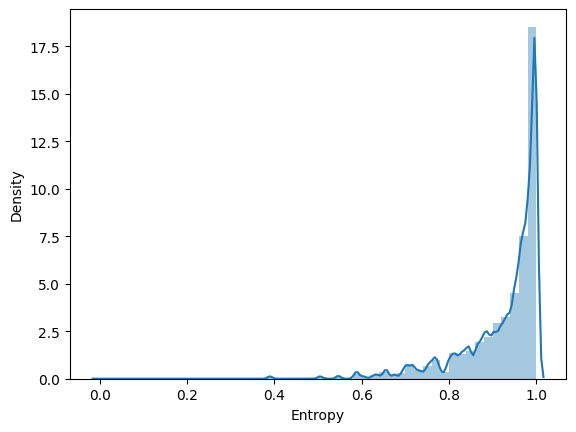

In [26]:
# 3. Calculate Entropy for each question
# Check IsCorrect by QuestionId

from scipy.stats import entropy

entropy = train.groupby('QuestionId')['IsCorrect'].apply(
    lambda x: entropy(x.value_counts(normalize=True), base=2)
)

# Merge Entropy to train

train['Entropy'] = train['QuestionId'].map(entropy)

sns.distplot(train['Entropy'])

In [33]:
rank = train.groupby('QuestionId')['UserId'].count().rank(method='first', ascending=False).astype('int16')
rank.info()

submission = pd.read_csv('submission/template.csv')
submission['ranking'] = rank

top_20_submission = submission.nlargest(20, 'ranking')

<class 'pandas.core.series.Series'>
Int64Index: 948 entries, 0 to 947
Series name: UserId
Non-Null Count  Dtype
--------------  -----
948 non-null    int16
dtypes: int16(1)
memory usage: 9.3 KB


In [38]:
submission = pd.read_csv('submission/template.csv')
submission['ranking'] = rank

submission.sort_values(by=['QuestionId'], ascending=True, inplace=True)
submission.head(20)

,QuestionId,ranking
0,0,57
1,1,903
2,2,260
3,3,80
4,4,452
5,5,631
6,6,434
7,7,830
8,8,250
9,9,630


In [40]:
submission.to_csv('submission/submission_final.csv', index=False)

In [50]:
# load evaluators' score on "validation" set
eval_validation = pd.read_csv('data/test_data/quality_response_remapped_public.csv')
print(len(eval_validation))
eval_validation.head()

25


,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS
0,0,0,909,318,2,2,2,1.0,2
1,16,16,285,609,2,2,2,2.0,2
2,48,48,132,271,1,2,2,2.0,1
3,38,38,704,127,2,2,1,2.0,2
4,33,33,16,586,1,1,2,2.0,2


<Axes: >

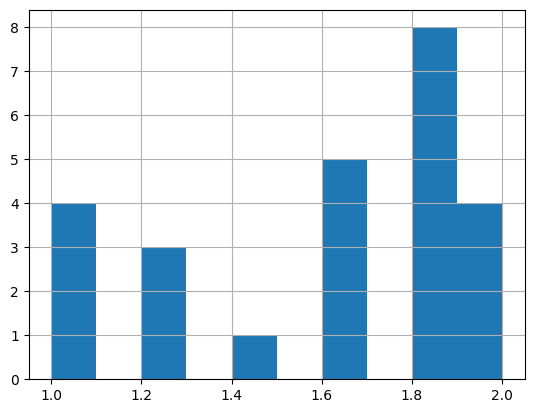

In [52]:
# take the average of 5 evaulators` scores
eval_validation['score'] = eval_validation.filter(regex='^T', axis = 1).mean(axis=1)
eval_validation['score'].hist()

<Axes: >

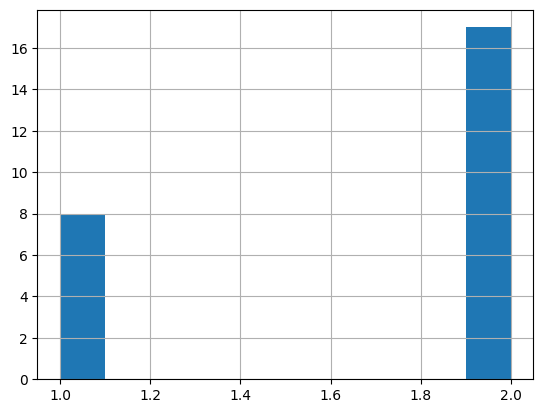

In [53]:

# decide preference
import numpy as np
def calc_preference(scores):
    preference = np.ones(len(scores), dtype=int)

    idx_two = scores > 1.5
    preference[idx_two] = 2

    return list(preference)

eval_validation['preference'] = calc_preference(eval_validation['score'])
eval_validation['preference'].hist()

In [54]:
eval_test = pd.read_csv('data/test_data/quality_response_remapped_private.csv')
print(len(eval_test))
eval_test.head()

25


,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS
0,15,15,145,762,2,2,2,2.0,2
1,31,31,307,208,1,1,1,2.0,1
2,25,25,278,195,1,1,1,1.0,1
3,3,3,13,153,2,2,2,2.0,2
4,40,40,23,100,2,1,1,1.0,1


<Axes: >

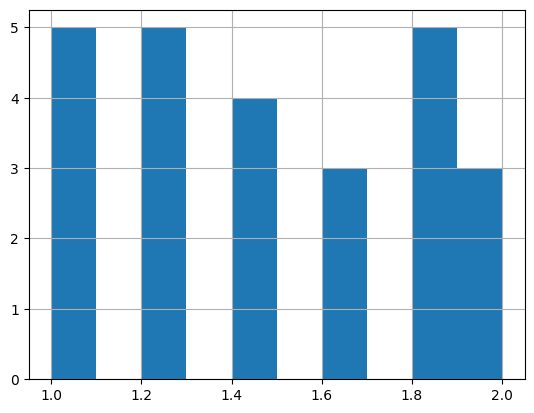

In [55]:
# take the average of scores by 5 evaulators
eval_test['score'] = eval_test.filter(regex='^T', axis = 1).mean(axis=1)
eval_test['score'].hist()

In [63]:
def evaluate(truth, submission):
    # extract ranking
    left = list(truth.left)
    right = list(truth.right)
    # if len(left) != len(right):
    # message = 'left and right lengths are not the same'
    # sys.exit(message)

    submission_left = []
    submission_right = []
    submission_preference = []
    for idx in range(len(left)):
        submission_left.append(left[idx])
        submission_right.append(right[idx])
        ranking_left = submission[submission.QuestionId==left[idx]].ranking.values[0]
        ranking_right = submission[submission.QuestionId==right[idx]].ranking.values[0]
        preference = 1 if ranking_left < ranking_right else 2
        submission_preference.append(preference)
    print(submission_preference)

    T = []
    T.append(list(truth.T1_ALR))
    T.append(list(truth.T2_CL))
    T.append(list(truth.T3_GF))
    T.append(list(truth.T4_MQ))
    T.append(list(truth.T5_NS))

    for k in range(5):
        cnt = 0
        for i in range(len(submission_preference)):
            if T[k][i] == submission_preference[i]:
                cnt += 1
        print(cnt / len(submission_preference))

In [64]:
evaluate(eval_validation, submission)

[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
0.4
0.6
0.44
0.48
0.32


In [65]:
eval_validation.head()

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,score,preference
0,0,0,909,318,2,2,2,1.0,2,1.8,2
1,16,16,285,609,2,2,2,2.0,2,2.0,2
2,48,48,132,271,1,2,2,2.0,1,1.6,2
3,38,38,704,127,2,2,1,2.0,2,1.8,2
4,33,33,16,586,1,1,2,2.0,2,1.6,2


In [66]:
eval_test.head()

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,score
0,15,15,145,762,2,2,2,2.0,2,2.0
1,31,31,307,208,1,1,1,2.0,1,1.2
2,25,25,278,195,1,1,1,1.0,1,1.0
3,3,3,13,153,2,2,2,2.0,2,2.0
4,40,40,23,100,2,1,1,1.0,1,1.2


In [67]:
evaluate(eval_test, submission)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]
0.44
0.56
0.64
0.48
0.52
